# Module 5: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Understand what can cause violations in the linear regression assumptions.
2. Enhance your skills in identifying and diagnosing violated assumptions.
3. Learn some basic methods of addressing violated assumptions.


General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [1]:
# Load Required Packages
library(ggplot2)

## Problem 1: Let's Violate Some Assumptions!

When looking at a single plot, it can be difficult to discern the different assumptions being violated. In the following problem, you will simulate data that purposefully violates each of the four linear regression assumptions. Then we can observe the different diagnostic plots for each of those assumptions.

#### 1. (a) Linearity

Generate SLR data that violates the linearity assumption, but maintains the other assumptions. Create a scatterplot for these data using ggplot.

Then fit a linear model to these data and comment on where you can diagnose nonlinearity in the diagnostic plots.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



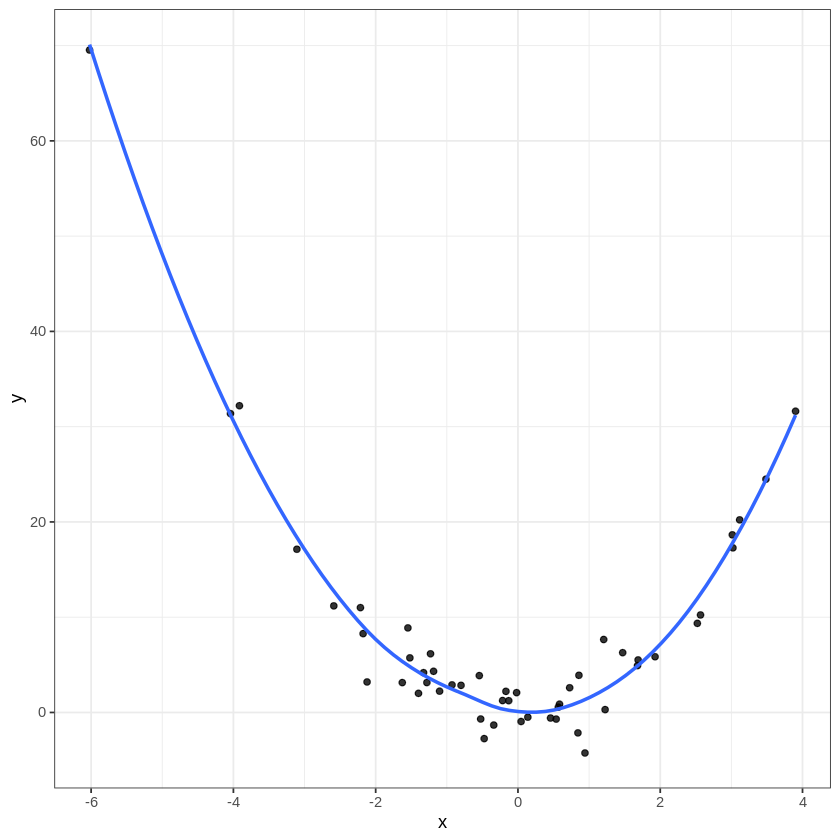

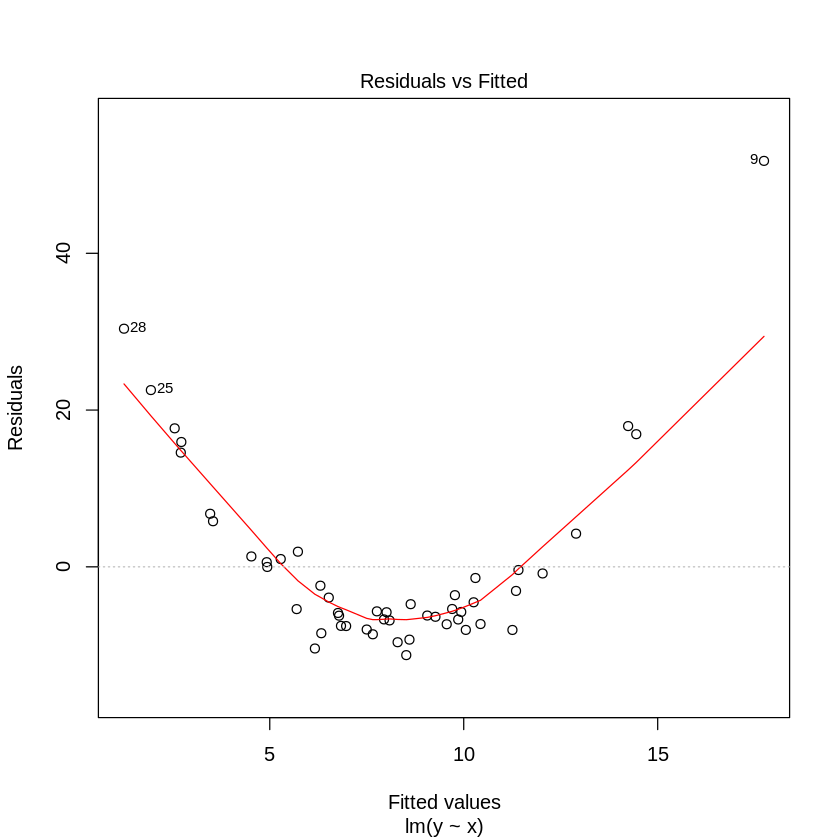

In [3]:
# Your Code Here
set.seed(8)
xdata = rnorm(50,0,2)
ydata = 2*xdata**2 + rnorm(50,0,2)
data1 = data.frame(y = ydata, x = xdata)
ggplot(data1, aes(x = x, y = y)) +
    geom_point(alpha = 0.8) +
    geom_smooth(se = F)+
    theme_bw()
    
lmod1 = lm(y~x, data = data1)
plot(lmod1, which=1:1)

As shown in the Residuals vs Fitted chart, we are seeing a curved relationship instead of a straight line.

#### 1. (b) Homoskedasticity

Simulate another SLR dataset that violates the constant variance assumption, but maintains the other assumptions. Then fit a linear model to these data and comment on where you can diagnose non-constant variance in the diagnostic plots.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



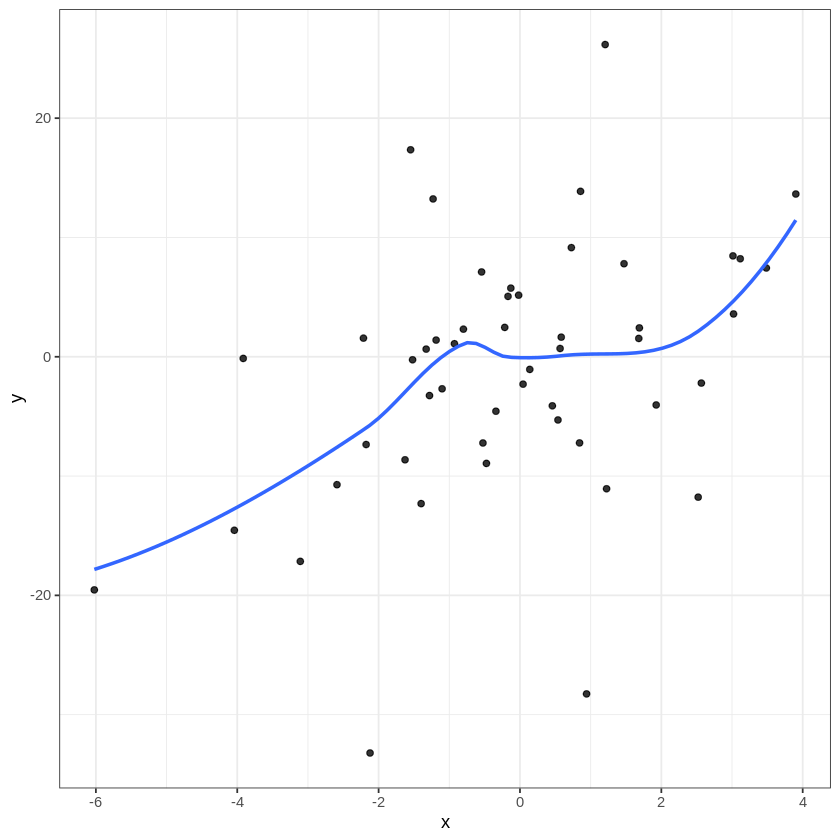

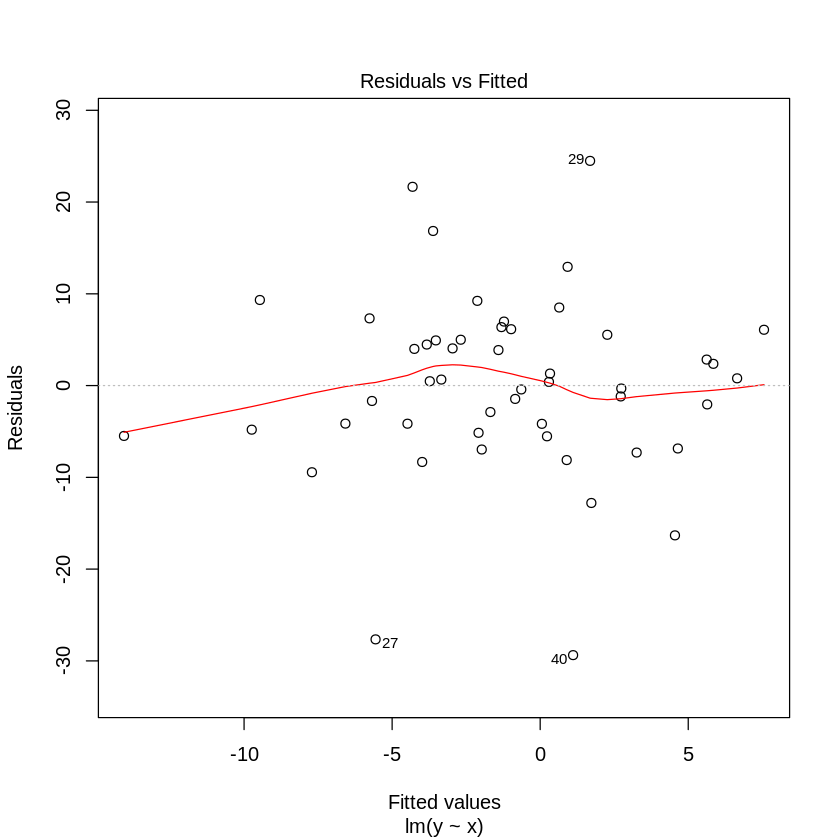

In [4]:
# Your Code Here
set.seed(8)
xdata2 = rnorm(50,0,2)
error_data1 = rnorm(25,0,5)
error_data2 = rnorm(25,0,10)
error = c(error_data1, error_data2)
ydata2 = 2*xdata2 + error
data2 = data.frame(y = ydata2, x = xdata2)
ggplot(data2, aes (x=x, y = y))+
    geom_point(alpha = 0.8)+
    geom_smooth(se = F)+
    theme_bw()
    
lmod2 = lm(y~x, data = data2)
plot(lmod2, which=1:1)

 In the chart above, I can diagnose non-constant variance because the spread is not consistent throughout.

#### 1. (c) Independent Errors

Repeat the above process with simulated data that violates the independent errors assumption.

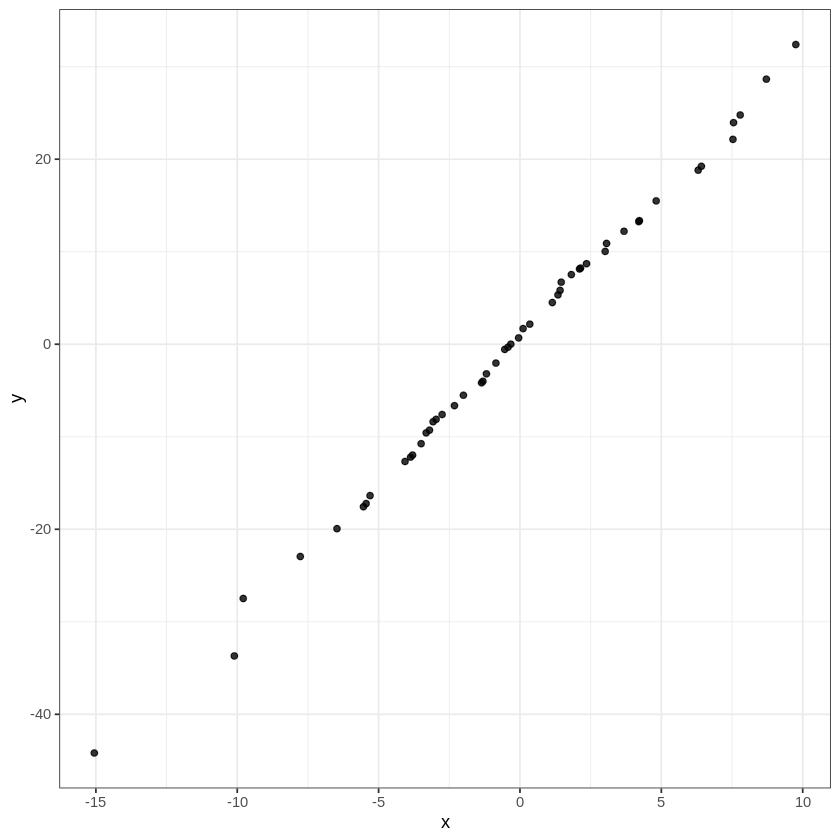

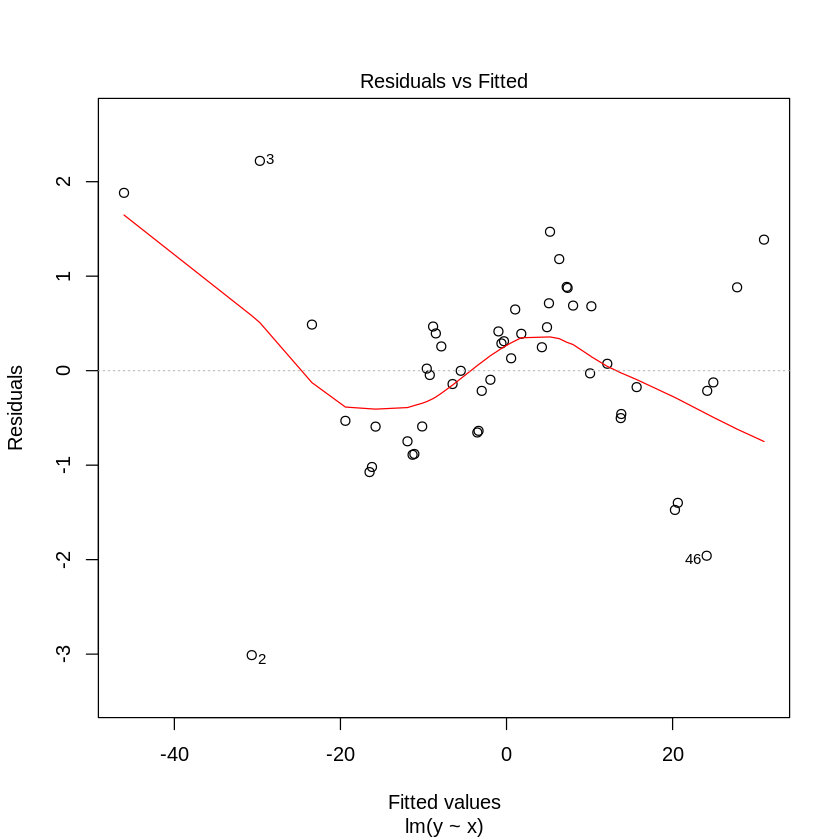

In [5]:
# Your Code Here
set.seed(8)
xdata3 = rnorm(50,0,5)
error_data = rnorm(50,0,5)
#So I can evaluate for indepedent errors, I am creating an index for the x values
xdata3 = sort(xdata3)
error = sort(error_data)
ydata3 = 1 + 2*xdata3 + error
data3 = data.frame(y = ydata3, x = xdata3)
ggplot(data3, aes(x=x, y = y))+
    geom_point(alpha = 0.8)+
    theme_bw()
    
lmod3 = lm(y~x, data = data3)
plot(lmod3, which=1:1)

In the chart above, since we are seeing some cyclical structure in the residuals, we are violating the independence assumption.

#### 1. (d) Normally Distributed Errors

Only one more to go! Repeat the process again but simulate the data with non-normal errors.

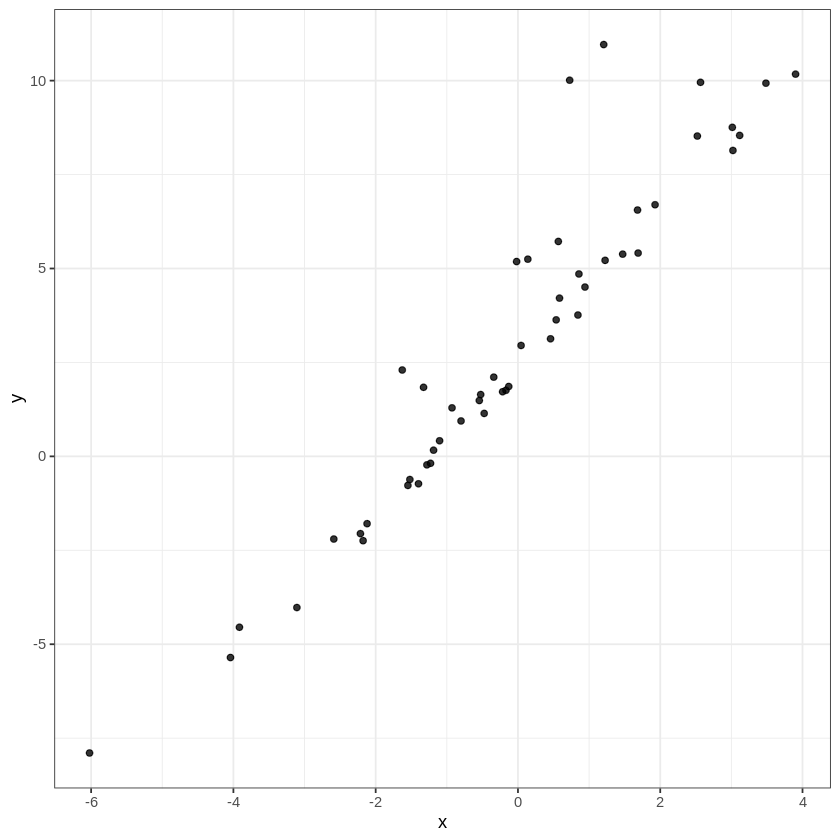

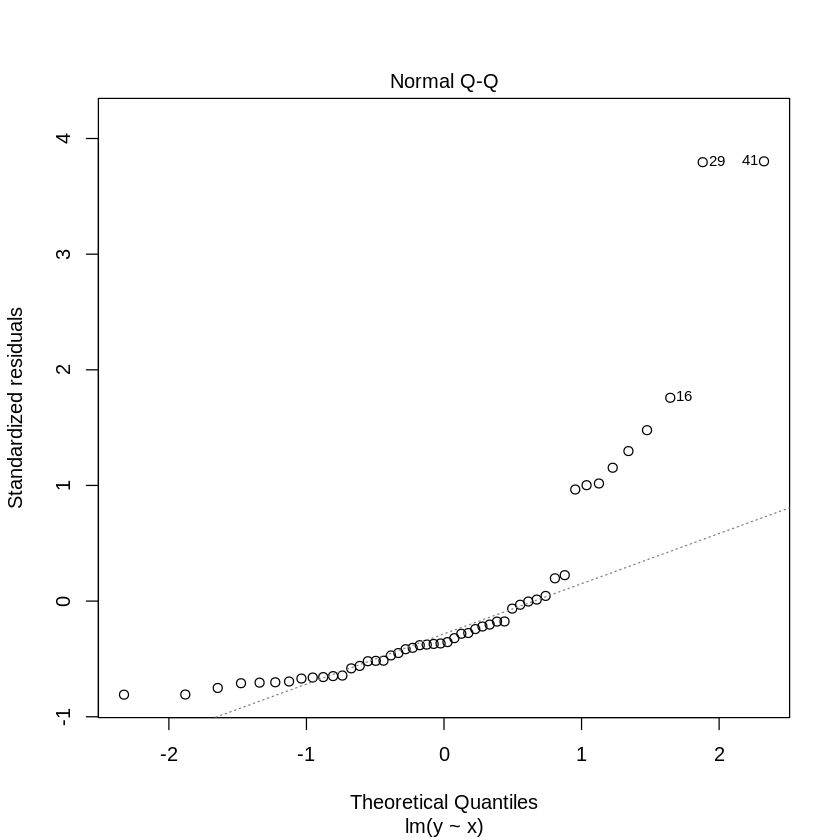

In [6]:
# Your Code Here
set.seed(8)
xdata4 = rnorm(50,0,2)
ydata4 = 2 + xdata4*2 + rexp(50)
data4 = data.frame(y = ydata4, x = xdata4)
ggplot(data4, aes(x = x, y = y))+
    geom_point(alpha = 0.8) +
    theme_bw()

lmod4 = lm(y~x, data = data4)
plot(lmod4, which=2:2)

In the Q-Q plot above, we see almost horizontal lines instead of points lining up near the line y is equal to x.

# Problem 2: Hats for Sale

Recall that the *hat* or *projection* matrix is defined as 

$$H = X(X^TX)^{-1}X^T.$$

The goal of this question is to use the hat matrix to prove that the fitted values, $\widehat{\mathbf Y}$, and the residuals, $\widehat{\boldsymbol\varepsilon}$, are uncorrelated. It's a bit of a process, so we will do it in steps.

#### 2. (a) Show that $\widehat{Y} = HY$. That is, $H$ "puts a hat on" $Y$.

$\widehat{\mathbf Y} = X\widehat{\beta} = X(X^TX)^{-1}X^TY = HY$

#### 2. (b) Show that $H$ is symmetric: $H = H^T$.

$H^T = [X(X^TX)^{-1}X^T]^T = X[X(X^TX)^{-1}]^T = X[(X^TX)^{-1}]^TX^T = X[(X^TX)^T]^{-1}X^T = X(X^TX)^{-1}X^T = H$

#### 2. (c) Show that $H(I_n - H) = 0_n$, where $0_n$ is the zero matrix of size $n \times n$.**

In [ ]:
#We first want to show that H is independent, H*H = H

$HH = X(X^TX)^{-1}X^TX(X^TX)^{-1}X^T = X(X^TX)^{-1}(X^TX)(X^TX)^{-1}X^T = X(X^TX)^{-1}X^T = H$

In [ ]:
#Now we can show that:

$H(I_n - H) = H - HH = H - H = 0_n$

**2. (d) Stating that $\widehat{\mathbf Y}$ is uncorrelated with $\widehat{\boldsymbol\varepsilon}$ is equivalent to showing that these vectors are orthogonal.\* That is, we want their dot product to equal zero:**

$$ \widehat{\mathbf Y}^T\widehat{\boldsymbol\varepsilon} = 0.$$ 

Prove this result. Also explain why being uncorrelated, in this case, is equivalent to the being orthogonal.

$ \widehat{\mathbf Y}^T\widehat{\boldsymbol\varepsilon} = \widehat{\mathbf Y}^T(Y-X\widehat{\beta}) = \widehat{\mathbf Y}^T(Y - HY) = (HY)^T(1-H)Y = Y^TH^T(1-H)Y = Y^TH(1-H)Y = Y^T0_nY = 0$ 


Two random variables are uncorrelated if their covariance is 0.  We also know two vectors are orthogonal if their dot product is 0. Since we proved

$ \widehat{\mathbf Y}^T\widehat{\boldsymbol\varepsilon} = 0.$

we also prove that these two vectors are orthogonal.

#### 2.(e) Why is this result important in the practical use of linear regression?

If we see the residuals $\widehat{\boldsymbol\varepsilon}$ and the predicted values $\widehat{\mathbf Y}$ are uncorrelated then we can use the Residuals vs Fitted plot to the determine if different assumptions of the linear regression model are being violated.

## Problem 3: Model Diagnosis

We here at the University of Colorado's Department of Applied Math love Bollywood movies. So, let's analyze some data related to them!

We want to determine if there is a linear relation between the amount of money spent on a movie (it's budget) and the amount of money the movie makes. Any venture capitalists among you will certianly hope that there is at least some relation. So let's get to modelling!

#### 3. (a) Initial Inspection

Load in the data from local directory and create a linear model with `Gross` as the response and `Budget` as the feature. The data is stored in the same local directory and is called `bollywood_boxoffice.csv`. Thank the University of Florida for this specific dataset.

Specify whether each of the four regression model assumptions are being violated.

Data Source: http://www.bollymoviereviewz.com

                  Movie         Gross            Budget      
 1920London          :  1   Min.   :  0.63   Min.   :  4.00  
 2 States\xa0        :  1   1st Qu.:  9.25   1st Qu.: 19.00  
 24(Tamil,Telugu)    :  1   Median : 29.38   Median : 34.50  
 Aashiqui 2          :  1   Mean   : 53.39   Mean   : 45.25  
 AeDilHainMushkil\xa0:  1   3rd Qu.: 70.42   3rd Qu.: 70.00  
 AGentleman          :  1   Max.   :500.75   Max.   :150.00  
 (Other)             :184                                    

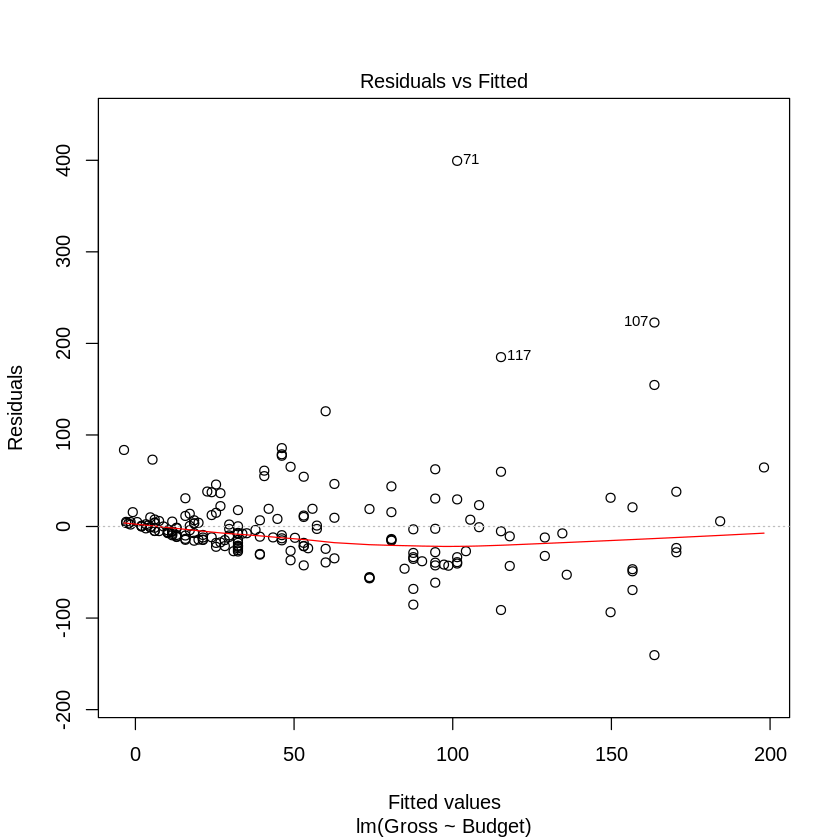

In [7]:
# Load the data
bollywood = read.csv("bollywood_boxoffice.csv")
summary(bollywood)

# Your Code Here
# ggplot(bollywood, aes(x = Budget, y = Gross)) + 
#     geom_point()+
#     geom_smooth(method = lm, se = TRUE)
lmod = lm(Gross~Budget, data = bollywood)
plot(lmod, which=1:1)

Linearity Assumption - We are seeing many points near the straight line and several outliers especially with the lower x values.  It doesn't look to me like the Linearity Assumption is being violated

Homoskedasticity Assumption - The constant variance assumption is being violated.  We see for lower values of y_hat you see small variances in the residuals.  But as you move toward large fitted values, you get much larger variances.

Independence Assumption - In the chart above, I don't see a cyclical structure in the residuals, so we are not violating the independence assumption.

Normality Assumption - I am seeing random scatter at higher x values but possibly some patterns at lower x values.  It looks like this Assumption is also being violated.

#### 3. (b) Transformations

Notice that the Residuals vs. Fitted Values plot has a 'trumpet" shape to it, the points have a greater spread as the Fitted value increases. This means that there is not a constant variance, which violates the homoskedasticity assumption.

So how do we address this? Sometimes transforming the predictors or response can help stabilize the variance. Experiment with transfomrations on `Budget` and/or `Gross` so that, in the transformed scale, the relationship is approximately linear with a constant variance. Limit your transformations to square root, logarithms and exponentiation. 

Note: There may be multiple transformations that fix this violation and give similar results. For the purposes of this problem, the transformed model doesn't have the be the "best" model, so long as it maintains both the linearity and homoskedasticity assumptions.

In [ ]:
# ### TESTING TESTING TESTING
# bollywood$sqrtBudget = sqrt(bollywood$Budget)
# #head(bollywood)

# ggplot(bollywood, aes(x = sqrtBudget, y = sqrtGross)) + geom_point()+ geom_smooth(method = lm, se = TRUE)

# new_lmod2 = lm(sqrtGross~sqrtBudget, data = bollywood)
# summary(new_lmod2)

In [ ]:
# ### TESTING TESTING TESTING
# bollywood$logGross = log(bollywood$Gross)
# #head(bollywood)

# ggplot(bollywood, aes(x = Budget, y = logGross)) + geom_point()+ geom_smooth(method = lm, se = TRUE)

# new_lmod3 = lm(logGross~Budget, data = bollywood)
# summary(new_lmod3)

In [ ]:
# ### TESTING TESTING TESTING
# bollywood$recGross = 1/ bollywood$Gross
# bollywood$recBudget = 1/ bollywood$Budget
# #head(bollywood)

# ggplot(bollywood, aes(x = recBudget, y = recGross)) + geom_point()+ geom_smooth(method = lm, se = TRUE)

# new_lmod5 = lm(recGross~recBudget, data = bollywood)
# summary(new_lmod5)

In [ ]:
# ### TESTING TESTING TESTING
# bollywood$squaredGross = bollywood$Gross^2
# bollywood$squaredBudget = bollywood$Budget^2
# #head(bollywood)

# ggplot(bollywood, aes(x = squaredBudget, y = squaredGross)) + geom_point()+ geom_smooth(method = lm, se = TRUE)

# new_lmod6 = lm(squaredGross~squaredBudget, data = bollywood)
# summary(new_lmod6)

In [ ]:
# ### TESTING TESTING TESTING
# bollywood$squaredGross = bollywood$Gross^2
# bollywood$squaredBudget = bollywood$Budget^2
# #head(bollywood)

# ggplot(bollywood, aes(x = squaredBudget, y = Gross)) + geom_point()+ geom_smooth(method = lm, se = TRUE)

# new_lmod6 = lm(Gross~squaredBudget, data = bollywood)
# summary(new_lmod6)

In [ ]:
# Your Code Here
# THE PLOT BELOW SHOWS THAT I AM NO LONGER VIOLATING THE LINEARITY ASSUMPTION when taking the log of both 'Gross' and 'Budget'.  
# THE POINTS ARE MORE CLOSER TO THE FITTED LINE THAN WHEN I JUST USED 'Gross' and 'Budget'.
bollywood$logGross = log(bollywood$Gross)
bollywood$logBudget = log(bollywood$Budget)

ggplot(bollywood, aes(x = logBudget, y = logGross)) + geom_point()+ geom_smooth(method = lm, se = TRUE)

In [ ]:
# The constant variance assumption is no longer being violated.  We see for 
# any value of y_hat you see variances in the residuals mostly between -2 and 2 except for a few outliers.
new_lmod4 = lm(logGross~logBudget, data = bollywood)
plot(new_lmod4, which=1:1)

In [ ]:
## Finally, in this summary, I am showing that the R-squared is now 0.5982 whereas before I had 0.4653.
summary(new_lmod4)

#### 3. (c) Interpreting Your Transformation

You've fixed the nonconstant variance problem! Hurray! But now we have a transformed model, and it will have a different interpretation than a normal linear regression model. Write out the equation for your transformed model. Does this model have an interpretation similar to a standard linear model?

In [ ]:
new_lmod4

# The equation is:
log(Y) = 1.32 * log(X) - 1.44 OR
log(Gross) = 1.32 * log(Budget) - 1.44


In [ ]:
# No it is not a standard linear model because when you log-transform a dependent variable 
# that implies our simple linear model has been exponentiated.